In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib.colors import LogNorm
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
%matplotlib inline

In [2]:
machine = 'mac'
#machine = 'magny'

if machine == 'magny':
    filedir = "/home/extmilan/masterthesis/files/"
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac':
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
else:
    raise NotADirectoryError

In [18]:
#### path = /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/*
level = 4

j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in range(127,128,1):
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[1,2,3,4], 
            haloid=0, galradfac=0.1, verbose=True) 

        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
     

level   : 4
halo    : 24
snapnr  : 127
basedir : /Users/smilanov/Desktop/Auriga/level4/
halodir : /Users/smilanov/Desktop/Auriga/level4/halo_24/
snappath: /Users/smilanov/Desktop/Auriga/level4/halo_24/output/

[ 34.42281723  33.16259384  37.29567337]
Found 1783163 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



In [30]:
i_dm = np.where(s.type == 1)

In [32]:
i_stars = np.where(s.type == 4)

In [33]:
1000* np.max(s.pos[i_stars])

43582.149505615234

In [27]:
print(np.sum(i_stars), np.sum(i_dm))

0 869605


In [4]:
s.cosmology_get_lookback_time_from_a( s.time, is_flat=True )

2.5673723560210484e-15

In [ ]:
### plot all stars in Simulation 24
istars, = np.where( (s.type == 4) )#& (s.halo == 0) )#& (s.subhalo == 0))
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)

binnum = 401
H1, xedges1, yedges1 = np.histogram2d(x, y, bins=binnum)
H2, xedges2, yedges2 = np.histogram2d(rxy, z, bins=binnum)
vmin = 1e0
if np.max(H1) > np.max(H2):
    vmax = np.max(H1)
else: vmax = np.max(H2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
h1 = ax1.hist2d(x, y, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax = vmax)
h2 = ax2.hist2d(rxy, z, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax= vmax)
ax1.set_xlabel("x [kpc]")
ax1.set_ylabel("y [kpc]")
ax1.set_aspect('equal')
ax2.set_xlabel("R [kpc]")
ax2.set_ylabel("z [kpc]")
ax2.set_aspect('equal')
cbar2 = fig.colorbar(h2[3], ax = ax2 )


In [ ]:
### plot stars of halo 0 in Simulation 24

istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.subhalo == 0))
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)

binnum = 401
H1, xedges1, yedges1 = np.histogram2d(x, y, bins=binnum)
H2, xedges2, yedges2 = np.histogram2d(rxy, z, bins=binnum)
vmin = 1e0
if np.max(H1) > np.max(H2):
    vmax = np.max(H1)
else: vmax = np.max(H2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
h1 = ax1.hist2d(x, y, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax = vmax)
h2 = ax2.hist2d(rxy, z, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax= vmax)
ax1.set_xlabel("x [kpc]")
ax1.set_ylabel("y [kpc]")
ax1.set_aspect('equal')
ax2.set_xlabel("R [kpc]")
ax2.set_ylabel("z [kpc]")
ax2.set_aspect('equal')
cbar2 = fig.colorbar(h2[3], ax = ax2 )


In [ ]:
### plot stars of halo 0 within 400kpc in Simulation 24

istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.subhalo == 0))
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)

binnumxx = 401
cmap = copy.copy(plt.cm.inferno)
cmap.set_bad((0,0,0))  # Fill background with black

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
h = ax.hist2d(1000*x, 1000*y, bins=binnumxx, norm=matplotlib.colors.LogNorm(), cmap = cmap, \
           range = [[-400,400], [-400, 400]])
ax.set_xlabel("x [kpc]")
ax.set_ylabel("y [kpc]")
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
fig.colorbar(h[3], cax=cax)
#fig.savefig('../plots/aur_24_xy_distribution.png', dpi = 300, format = 'png', bbox_inches = 'tight')


In [5]:
def read_snap(snapnr, halo_number = 24):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    
    #print("level   : {0}".format(level))
    #print("halo    : {0}".format(halo_number))
    print("snapnr  : {0}".format(snapnr))
    #print("basedir : {0}".format(basedir))
    #print("halodir : {0}".format(halodir))
    #print("snappath: {0}\n".format(snappath))
    s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[4], 
        haloid=0, galradfac=0.1, verbose=True) 

    # Clean negative and zero values of gmet to avoid RuntimeErrors
    # later on (e.g. dividing by zero)
    s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )


    istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.subhalo == 0))
    (x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)
    snap_time = s.cosmology_get_lookback_time_from_a( s.time, is_flat=True )
    return(x, y, z), (vx, vy, vz), rxyz, rxy, snap_time

In [ ]:
## find min and max values of x, y, z and R in all snapshots to set frame for animation
get_minmaxvals = True
if get_minmaxvals == True:
    startnr = 60
    endnr = 128
    s_snap = np.arange(startnr,endnr,1)
    xmin, xmax, ymin, ymax, zmin, zmax, Rmin, Rmax = [], [], [], [], [], [], [], []
    for j in range(30):
        print(j)
        xmins, xmaxs, ymins, ymaxs, zmins, zmaxs, Rmins, Rmaxs = np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap)), np.zeros(len(s_snap))

        for i in range(len(s_snap)):
            (x, y, z), (vx, vy, vz), rxyz, rxy, snap_time = read_snap(s_snap[i], j+1)
            xmins[i], xmaxs[i] = np.min(x), np.max(x)
            ymins[i], ymaxs[i] = np.min(y), np.max(y)
            zmins[i], zmaxs[i] = np.min(z), np.max(z)
            Rmins[i], Rmaxs[i] = np.min(rxy), np.max(rxy)

        xmin.append(np.min(xmins)) 
        xmax.append(np.min(xmaxs))                                                                                                      
        ymin.append(np.min(ymins)) 
        ymax.append(np.min(ymaxs))                                                                                                        
        zmin.append(np.min(zmins)) 
        zmax.append(np.min(zmaxs))                                                                                                        
        Rmin.append(np.min(Rmins)) 
        Rmax.append(np.min(Rmaxs))                                                                                                         

    print(xmin, xmax, ymin, ymax, zmin, zmax, Rmin, Rmax)
    halonums = np.arange(1,31,1)
    dataout = ([halonums, np.array(xmin), np.array(xmax), np.array(ymin), np.array(ymax), np.array(zmin), np.array(zmax), np.array(Rmin), np.array(Rmax)])  
    np.savetxt(filedir + 'min_max_vals_for_animation_frame_all_simulations.txt', dataout, header='Halo number\txmin [kpc]\txmax [kpc]\tymin [kpc]\tymax [kpc]\tzmin [kpc]\tzmax [kpc]\tRmin [kpc]\tRmax [kpc]')
    

0
snapnr  : 60
[ 10.80167866  10.62913895  10.01251793]
Found 243287 stars.
Rotated pos.
Rotated vel.

galrad  : 0.007770749926567078
redshift: 2.1032696525957713
time    : 0.32224076923625916
center  : [ 0.  0.  0.]

snapnr  : 61
[ 11.16447926  10.98350334  10.31935501]
Found 265117 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008071627467870712
redshift: 2.0020281392528516
time    : 0.3331081367707903
center  : [ 0.  0.  0.]

snapnr  : 62
[ 11.53900623  11.35042381  10.63388443]
Found 286825 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008416595309972763
redshift: 1.9040895435327672
time    : 0.344341999449342
center  : [ 0.  0.  0.]

snapnr  : 63
[ 11.86988544  11.67548466  10.9103241 ]
Found 304113 stars.
Rotated pos.
Rotated vel.

galrad  : 0.00867537260055542
redshift: 1.822689252620354
time    : 0.3542720825792927
center  : [ 0.  0.  0.]

snapnr  : 64
[ 12.21091938  12.01042843  11.19221878]
Found 333235 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008959954977035523
redshift

Found 1195127 stars.
Rotated pos.
Rotated vel.

galrad  : 0.017721757292747498
redshift: 0.4402978492477432
time    : 0.6943008354294861
center  : [ 0.  0.  0.]

snapnr  : 99
[ 23.50177765  23.17096901  19.96167946]
Found 1200732 stars.
Rotated pos.
Rotated vel.

galrad  : 0.01786114126443863
redshift: 0.41996894199726653
time    : 0.7042407551488017
center  : [ 0.  0.  0.]

snapnr  : 100
[ 23.83550262  23.50397682  20.20912361]
Found 1200902 stars.
Rotated pos.
Rotated vel.

galrad  : 0.018023380637168886
redshift: 0.3999269646135635
time    : 0.7143229791820179
center  : [ 0.  0.  0.]

snapnr  : 101
[ 24.17401123  23.84150887  20.45946121]
Found 1209444 stars.
Rotated pos.
Rotated vel.

galrad  : 0.018193989992141724
redshift: 0.38016786726023866
time    : 0.7245495448210172
center  : [ 0.  0.  0.]

snapnr  : 102
[ 24.51725006  24.18345642  20.71289825]
Found 1220113 stars.
Rotated pos.
Rotated vel.

galrad  : 0.018315242230892183
redshift: 0.36068765726181673
time    : 0.73492251852

[ 13.93747997  13.56408501  13.36296654]
Found 461745 stars.
Rotated pos.
Rotated vel.

galrad  : 0.010999404639005662
redshift: 1.4719748452657977
time    : 0.40453486082803386
center  : [ 0.  0.  0.]

snapnr  : 69
[ 14.26922512  13.88191414  13.68339729]
Found 495073 stars.
Rotated pos.
Rotated vel.

galrad  : 0.011339297145605089
redshift: 1.4140982203725216
time    : 0.41423335287728646
center  : [ 0.  0.  0.]

snapnr  : 70
[ 14.60795021  14.20752239  14.01134205]
Found 522608 stars.
Rotated pos.
Rotated vel.

galrad  : 0.011675653606653215
redshift: 1.3575766674029972
time    : 0.42416436072959446
center  : [ 0.  0.  0.]

snapnr  : 71
[ 14.95471191  14.54072952  14.34739304]
Found 547217 stars.
Rotated pos.
Rotated vel.

galrad  : 0.012055453658103944
redshift: 1.3023784599059653
time    : 0.4343334588184266
center  : [ 0.  0.  0.]

snapnr  : 72
[ 15.3090477   14.88127232  14.69167328]
Found 574502 stars.
Rotated pos.
Rotated vel.

galrad  : 0.01254105418920517
redshift: 1.2484726

Found 1687512 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023344603180885316
redshift: 0.29158323972192446
time    : 0.7742435556962617
center  : [ 0.  0.  0.]

snapnr  : 107
[ 26.92307281  25.97977257  25.69806671]
Found 1698879 stars.
Rotated pos.
Rotated vel.

galrad  : 0.024088223278522492
redshift: 0.2733533465784399
time    : 0.7853279709729014
center  : [ 0.  0.  0.]

snapnr  : 108
[ 27.17785263  26.22222519  25.93809891]
Found 1750101 stars.
Rotated pos.
Rotated vel.

galrad  : 0.024333263933658603
redshift: 0.2613432561610123
time    : 0.7928056023731169
center  : [ 0.  0.  0.]

snapnr  : 109
[ 27.56489563  26.58913612  26.30377579]
Found 1792366 stars.
Rotated pos.
Rotated vel.

galrad  : 0.024635602533817292
redshift: 0.24354018155467028
time    : 0.8041557601699713
center  : [ 0.  0.  0.]

snapnr  : 110
[ 27.95588493  26.9634552   26.67808723]
Found 1806198 stars.
Rotated pos.
Rotated vel.

galrad  : 0.024925471842288972
redshift: 0.22598838626019768
time    : 0.815668411

Found 765635 stars.
Rotated pos.
Rotated vel.

galrad  : 0.014693653583526612
redshift: 1.074457894547674
time    : 0.4820536500780824
center  : [ 0.  0.  0.]

snapnr  : 77
[ 16.56892395  15.99098587  14.66962433]
Found 799004 stars.
Rotated pos.
Rotated vel.

galrad  : 0.014842745661735535
redshift: 1.035510445664141
time    : 0.4912772627279358
center  : [ 0.  0.  0.]

snapnr  : 78
[ 16.97044754  16.36038589  14.98269844]
Found 832182 stars.
Rotated pos.
Rotated vel.

galrad  : 0.0150156706571579
redshift: 0.987852810815766
time    : 0.5030553542792862
center  : [ 0.  0.  0.]

snapnr  : 79
[ 17.29895592  16.66236877  15.23834038]
Found 860223 stars.
Rotated pos.
Rotated vel.

galrad  : 0.015236669778823854
redshift: 0.9505313515850327
time    : 0.5126808134549512
center  : [ 0.  0.  0.]

snapnr  : 80
[ 17.54946709  16.89298248  15.432724  ]
Found 883426 stars.
Rotated pos.
Rotated vel.

galrad  : 0.015404658019542695
redshift: 0.9230008161779089
time    : 0.5200205801199638
center  :

Found 1792674 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022178393602371217
redshift: 0.1692520332436107
time    : 0.8552476040823377
center  : [ 0.  0.  0.]

snapnr  : 115
[ 29.39356995  27.63591957  24.24757385]
Found 1808861 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022320336103439333
redshift: 0.15274876890238098
time    : 0.8674917093619414
center  : [ 0.  0.  0.]

snapnr  : 116
[ 29.67526817  27.88924026  24.45078659]
Found 1831899 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022441926598548892
redshift: 0.14187620396956202
time    : 0.8757516765159388
center  : [ 0.  0.  0.]

snapnr  : 117
[ 30.10203552  28.27343178  24.759161  ]
Found 1852031 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022603675723075867
redshift: 0.12575933241126092
time    : 0.8882893272206793
center  : [ 0.  0.  0.]

snapnr  : 118
[ 30.53536224  28.6628933   25.07192802]
Found 1861320 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022748519480228425
redshift: 0.10986994045882548
time    : 0.90100647

Rotated vel.

galrad  : 0.013681252300739289
redshift: 0.7910682489463392
time    : 0.5583260161014446
center  : [ 0.  0.  0.]

snapnr  : 85
[ 20.42702293  19.20774269  18.65857697]
Found 233406 stars.
Rotated pos.
Rotated vel.

galrad  : 0.014189328253269197
redshift: 0.7574413726158526
time    : 0.5690090239036288
center  : [ 0.  0.  0.]

snapnr  : 86
[ 20.7320118   19.48490906  18.92242622]
Found 241141 stars.
Rotated pos.
Rotated vel.

galrad  : 0.014436346292495728
redshift: 0.7326361820223115
time    : 0.5771552102951079
center  : [ 0.  0.  0.]

snapnr  : 87
[ 21.14561653  19.85774612  19.28252029]
Found 259633 stars.
Rotated pos.
Rotated vel.

galrad  : 0.014801490306854249
redshift: 0.7001063537185233
time    : 0.5881984958251407
center  : [ 0.  0.  0.]

snapnr  : 88
[ 21.46128654  20.13856506  19.55586052]
Found 289352 stars.
Rotated pos.
Rotated vel.

galrad  : 0.015156808495521546
redshift: 0.6761104112134777
time    : 0.596619407235837
center  : [ 0.  0.  0.]

snapnr  : 89


Rotated vel.

galrad  : 0.023985587060451508
redshift: 0.058507322794512984
time    : 0.9447265771954694
center  : [ 0.  0.  0.]

snapnr  : 123
[ 34.84710312  32.33820343  30.88229179]
Found 1706988 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023878394067287447
redshift: 0.04852362998180593
time    : 0.9537219490392906
center  : [ 0.  0.  0.]

snapnr  : 124
[ 35.3674202   32.80239868  31.31743622]
Found 1737917 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023754966259002686
redshift: 0.0337243718735154
time    : 0.9673758568617342
center  : [ 0.  0.  0.]

snapnr  : 125
[ 35.7185936   33.11606598  31.61066437]
Found 1765448 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02370482981204987
redshift: 0.023974428382762536
time    : 0.9765868876036025
center  : [ 0.  0.  0.]

snapnr  : 126
[ 36.25262833  33.5912323   32.05537033]
Found 1802543 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023648697137832644
redshift: 0.009521666967944764
time    : 0.99056814006128
center  : [ 0.  0.  0.]



snapnr  : 93
[ 21.28239632  21.14267349  23.39569473]
Found 933938 stars.
Rotated pos.
Rotated vel.

galrad  : 0.017726026475429535
redshift: 0.5463921831410221
time    : 0.6466664866145445
center  : [ 0.  0.  0.]

snapnr  : 94
[ 21.58018494  21.44058228  23.74607086]
Found 972474 stars.
Rotated pos.
Rotated vel.

galrad  : 0.017878232896327974
redshift: 0.524565820433923
time    : 0.6559244517992534
center  : [ 0.  0.  0.]

snapnr  : 95
[ 21.88292503  21.74306297  24.10113907]
Found 987404 stars.
Rotated pos.
Rotated vel.

galrad  : 0.01801767498254776
redshift: 0.5030475232448832
time    : 0.6653149581332802
center  : [ 0.  0.  0.]

snapnr  : 96
[ 22.18976974  22.0495739   24.46109581]
Found 1027663 stars.
Rotated pos.
Rotated vel.

galrad  : 0.018190468847751617
redshift: 0.4818329434209512
time    : 0.6748399031346985
center  : [ 0.  0.  0.]

snapnr  : 97
[ 22.50094795  22.36033058  24.82616234]
Found 1061546 stars.
Rotated pos.
Rotated vel.

galrad  : 0.018360145390033722
redshift

[ 12.6214838   11.89622211  11.95741177]
Found 178236 stars.
Rotated pos.
Rotated vel.

galrad  : 0.007625511288642884
redshift: 1.822689252620354
time    : 0.3542720825792927
center  : [ 0.  0.  0.]

snapnr  : 64
[ 13.00682449  12.23921204  12.30106735]
Found 194796 stars.
Rotated pos.
Rotated vel.

galrad  : 0.007855902612209321
redshift: 1.7435705743308647
time    : 0.3644885279628326
center  : [ 0.  0.  0.]

snapnr  : 65
[ 13.40436077  12.59200954  12.65497208]
Found 211451 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008148483186960221
redshift: 1.6666695561144653
time    : 0.3749995936718436
center  : [ 0.  0.  0.]

snapnr  : 66
[ 13.74536896  12.89404202  12.95757389]
Found 221325 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008469056338071823
redshift: 1.6042345220731056
time    : 0.3839899945738943
center  : [ 0.  0.  0.]

snapnr  : 67
[ 14.16660118  13.26536751  13.33042431]
Found 243318 stars.
Rotated pos.
Rotated vel.

galrad  : 0.009030611068010331
redshift: 1.5312390291

Found 1141294 stars.
Rotated pos.
Rotated vel.

galrad  : 0.017480479180812837
redshift: 0.38016786726023866
time    : 0.7245495448210172
center  : [ 0.  0.  0.]

snapnr  : 102
[ 27.50644684  24.61943436  24.73726273]
Found 1155616 stars.
Rotated pos.
Rotated vel.

galrad  : 0.017652086913585663
redshift: 0.36068765726181673
time    : 0.7349225185244588
center  : [ 0.  0.  0.]

snapnr  : 103
[ 27.78744507  24.85304832  24.97192192]
Found 1169410 stars.
Rotated pos.
Rotated vel.

galrad  : 0.017774690687656403
redshift: 0.3478538418581776
time    : 0.7419202059930923
center  : [ 0.  0.  0.]

snapnr  : 104
[ 28.21437836  25.20760345  25.32820702]
Found 1178244 stars.
Rotated pos.
Rotated vel.

galrad  : 0.01792232096195221
redshift: 0.32882972420595435
time    : 0.7525418658117033
center  : [ 0.  0.  0.]

snapnr  : 105
[ 28.64807701  25.56786728  25.68948555]
Found 1202479 stars.
Rotated pos.
Rotated vel.

galrad  : 0.018079161643981934
redshift: 0.31007412012783386
time    : 0.763315590

snapnr  : 60
[ 10.96751499  10.54684067  11.19934082]
Found 84249 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008027402311563491
redshift: 2.1032696525957713
time    : 0.32224076923625916
center  : [ 0.  0.  0.]

[-859.0, 469.0, -826.0, 449.0]
snapnr  : 60
[ 10.96751499  10.54684067  11.19934082]
Found 84249 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008027402311563491
redshift: 2.1032696525957713
time    : 0.32224076923625916
center  : [ 0.  0.  0.]



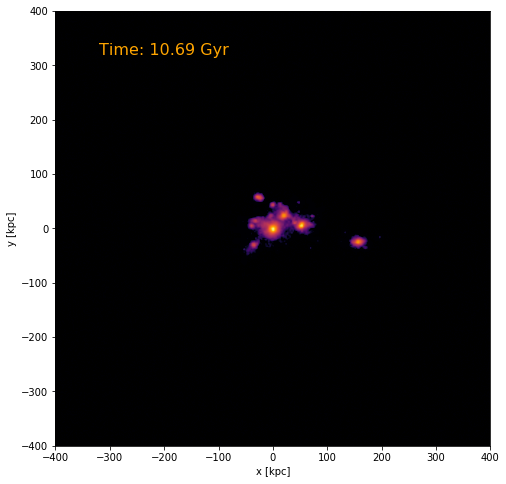

snapnr  : 60
[ 10.96751499  10.54684067  11.19934082]
Found 84249 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008027402311563491
redshift: 2.1032696525957713
time    : 0.32224076923625916
center  : [ 0.  0.  0.]

snapnr  : 60
[ 10.96751499  10.54684067  11.19934082]
Found 84249 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008027402311563491
redshift: 2.1032696525957713
time    : 0.32224076923625916
center  : [ 0.  0.  0.]

snapnr  : 61
[ 11.33949471  10.91451645  11.58535576]
Found 103761 stars.
Rotated pos.
Rotated vel.

galrad  : 0.008606187999248505
redshift: 2.0020281392528516
time    : 0.3331081367707903
center  : [ 0.  0.  0.]

snapnr  : 62
[ 11.72626972  11.2924757   11.99002552]
Found 156728 stars.
Rotated pos.
Rotated vel.

galrad  : 0.009122179448604583
redshift: 1.9040895435327672
time    : 0.344341999449342
center  : [ 0.  0.  0.]

snapnr  : 63
[ 12.06752777  11.62145424  12.35484123]
Found 164288 stars.
Rotated pos.
Rotated vel.

galrad  : 0.009642120450735092
redshift:

Found 1416479 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02003111392259598
redshift: 0.4609177941806475
time    : 0.684501211487295
center  : [ 0.  0.  0.]

snapnr  : 98
[ 23.80860329  22.96368408  25.21352386]
Found 1428816 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02028559446334839
redshift: 0.4402978492477432
time    : 0.6943008354294861
center  : [ 0.  0.  0.]

snapnr  : 99
[ 24.15342522  23.29395103  25.60112953]
Found 1445387 stars.
Rotated pos.
Rotated vel.

galrad  : 0.020526847243309023
redshift: 0.41996894199726653
time    : 0.7042407551488017
center  : [ 0.  0.  0.]

snapnr  : 100
[ 24.50271797  23.62892342  25.99520683]
Found 1470007 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02074236571788788
redshift: 0.3999269646135635
time    : 0.7143229791820179
center  : [ 0.  0.  0.]

snapnr  : 101
[ 24.85713387  23.96839905  26.39595032]
Found 1484340 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02092690169811249
redshift: 0.38016786726023866
time    : 0.7245495448210172


In [25]:
startnr = 60
endnr = 128
cmap = copy.copy(plt.cm.inferno)
cmap.set_bad((0,0,0))  # Fill background with black
norm=matplotlib.colors.LogNorm()
s_snap = np.arange(startnr,endnr,1)


xminlim, xmaxlim, yminlim, ymaxlim = int(xmin)-10, int(xmax)+10, int(ymin)-10, int(ymax)+10 
zminlim, zmaxlim, Rminlim, Rmaxlim = int(zmin)-10, int(zmax)+10, int(Rmin)-10, int(Rmax)+10
### for xy plot ###
(x, y, z), (vx, vy, vz), rxyz, rxy, snap_time = read_snap(s_snap[0])
X = x
Y = y
X = np.append(X, [xminlim, xmaxlim])
Y = np.append(Y, [yminlim, ymaxlim])

fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylim([-400, 400])
ax.set_xlim([-400, 400])
#Create 2d Histogram
data,xedges,yedges = np.histogram2d(X,Y, bins = 501)
#data_bg,x_bg,y_bg = np.histogram2d(X_bg,Y_bg, bins = 501)


#Smooth with filter
ext = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
print(ext)
im = plt.imshow(data.T, origin = 'lower', interpolation = 'gaussian', cmap = cmap, norm=norm, extent = ext, animated=True, )
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_aspect('equal')
time_text = ax.text(0.1, 0.9,'', color = 'orange', transform=ax.transAxes, fontsize=16)

#Define animation. 
def animate(i) :
    (x, y, z), (vx, vy, vz), rxyz, rxy, snap_time = read_snap(s_snap[i])
    X = x
    Y = y
    X = np.append(X, [xminlim, xmaxlim])
    Y = np.append(Y, [yminlim, ymaxlim])    
    #X = np.append(X, [-201, 201])
    #Y = np.append(Y, [-201, 201])
    data,xedge,yedge = np.histogram2d(X,Y, bins = 501)
    
    im.set_data(data)
    
    time_text.set_text("Lookback time: {:.2f} Gyr".format(snap_time) )
    

anim_xy = animation.FuncAnimation(fig, animate, frames=len(s_snap))

plt.show()

anim_xy.save('../plots/xy_evolution.gif',writer='imagemagick',fps=2)




In [14]:
print(xmin, xmax, ymin, ymax, zmin, zmax, Rmin, Rmax)

-849.114990234 459.571899414 -816.423339844 439.729125977 -330.904510498 318.737487793 0.0 863.537353516


In [ ]:
infile_minmax = filedir + 'min_max_vals_for_animation_frame_all_simulations.txt'
halnum, xmin, xmax, ymin, ymax, zmin, zmax, Rmin, Rmax = np.loadtxt(infile_minmax, unpack = True)
print(halnum)